1.1 Python Package

In [1]:
# notebook에 직접 그래프를 plot  
%matplotlib inline

# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn import datasets

from __future__ import absolute_import
from __future__ import print_function

import math

# from myutil import st         
# from corrplot import Corrplot

1.2  Data Load

In [2]:
housing = pd.read_csv('Data/Boston.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
housing.shape

(506, 14)

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


https://archive.ics.uci.edu/ml/datasets/Housing

Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: lower status of the population percentage 
14. MEDV: Median value of owner-occupied homes in $1000's

1.3  Simple Linear Regression

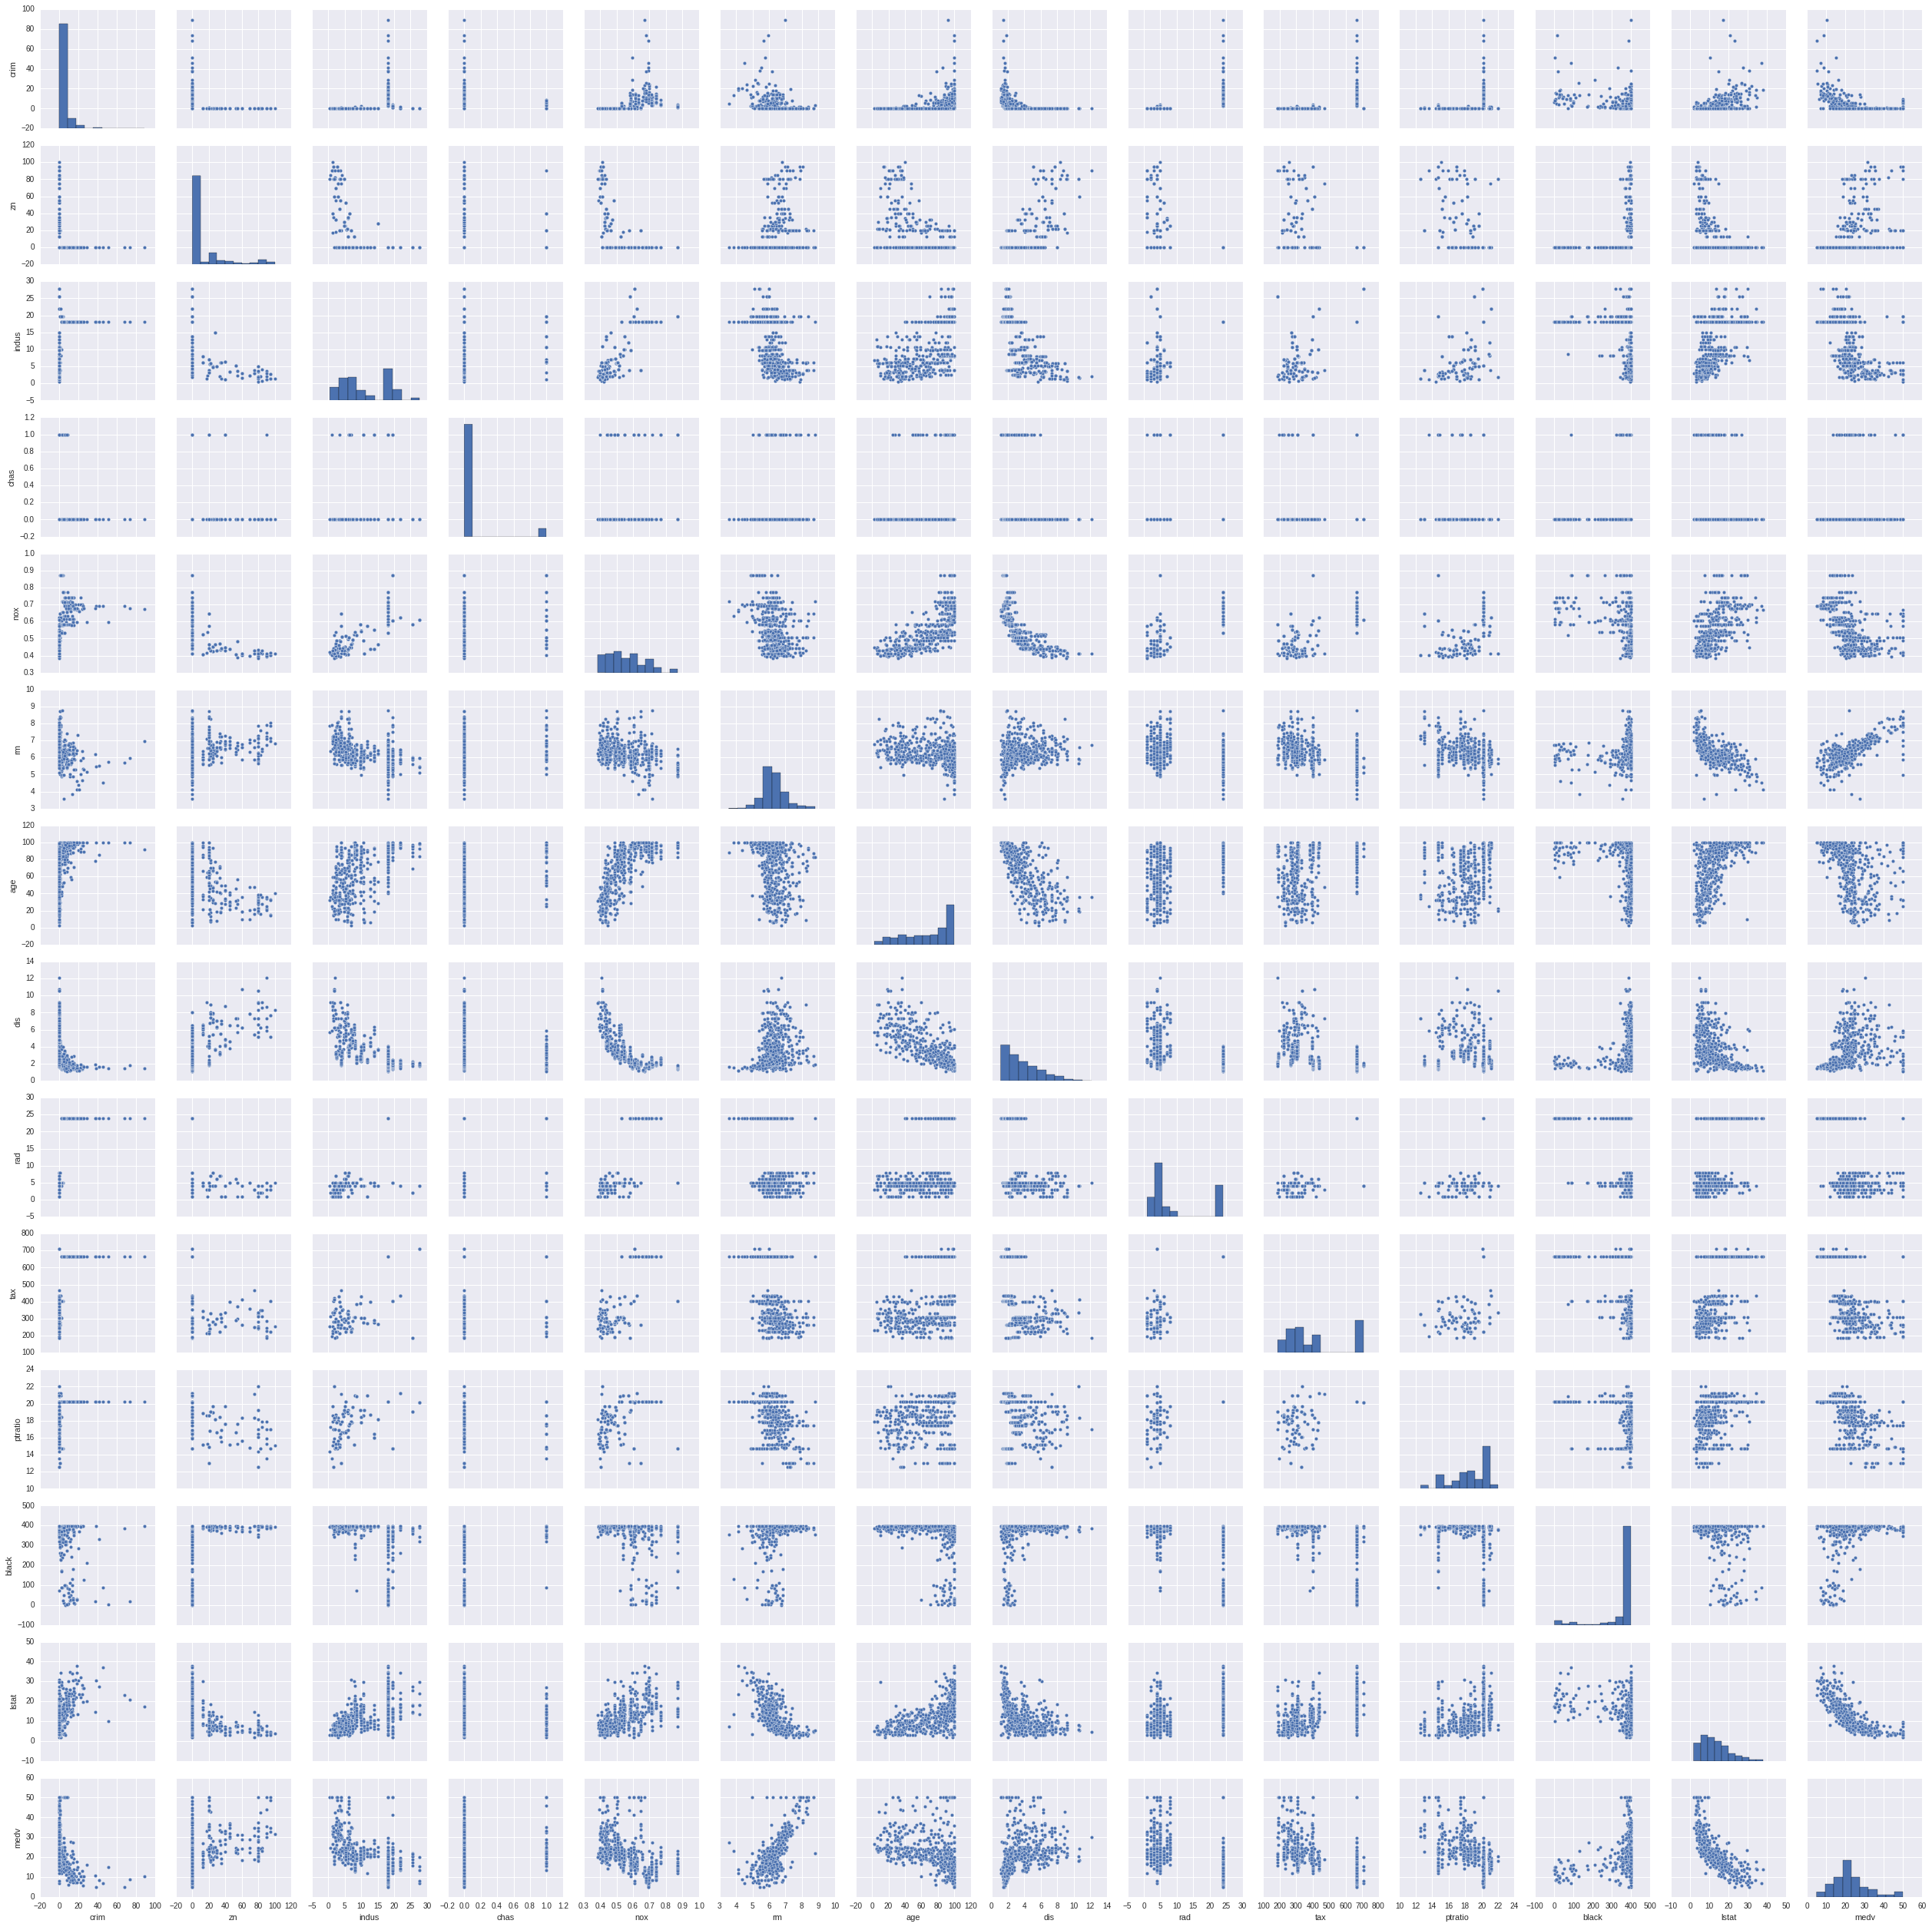

In [4]:
seaborn.pairplot(housing)

AGE와 MEDV가 비례. DIST,LSTAT와 MEDV 각각 반비례함.

In [5]:
# 앞에서 아래와 같이 R style formula load 했음 
# import statsmodels.formula.api as smf

# ordinary least squares (ols) 방식 linear regression 모델 만들기 
lm = smf.ols(formula='medv ~ lstat', data=housing).fit()

# coefficients
lm.params

lm.pvalues            # p values
# lm.rsquared           # R-squared statistic 

Intercept    3.743081e-236
lstat         5.081103e-88
dtype: float64

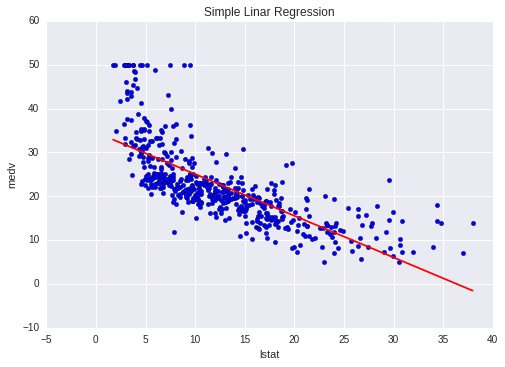

In [6]:
# 모델에 쓰인 데이터의 scatter plot과 모델의 결과를 plot 

plt.scatter(housing.lstat, housing.medv)
plt.xlabel("lstat")

#plt.scatter(housing.rm, housing.medv)
#plt.xlabel("rm ")
plt.ylabel("medv")


X = pd.DataFrame({'lstat':[housing.lstat.min(), housing.lstat.max()]})
#X = pd.DataFrame({'rm':[housing.rm.min(), housing.rm.max()]})
Y = lm.predict(X)
plt.plot(X, Y, c='red')
plt.title("Simple Linar Regression")


In [7]:
lm.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 18 Oct 2016   Prob (F-statistic):           5.08e-88
Time:                        08:24:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
lm.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,34.5538,0.563,61.415,0.000,33.448 35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026 -0.874


In [9]:
# statsmodel formula 인터페이스는 입력을 pandas의 DataFrame으로 해야...
x_new = pd.DataFrame({'lstat': [4]})    # dictionary로 df를 만드는 일반 방법 
# x_new.info()
x_new.head()

,lstat
0,4


1.4  Prediction

In [10]:
lm.predict(x_new)[0]   

30.753643464351139

1.5 Converting Data

In [11]:
maybe_lstat = housing.lstat + ((housing.lstat)*(housing.lstat))
log_lstat = np.log(maybe_lstat)

In [12]:
lm_mul2 = smf.ols(formula='medv ~ log_lstat', data=housing).fit()
lm_mul2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     985.3
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          1.16e-120
Time:                        08:24:21   Log-Likelihood:                -1566.1
No. Observations:                 506   AIC:                             3136.
Df Residuals:                     504   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     54.3441      1.041     52.202      0.000        52.299    56.389
log_lstat     -6.5637      0.209    -31.389      0.000        -6.974    -6.153
==============================================================================
Omnibus:                      124.919   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.901
Skew:                           1.237   Prob(JB):                     1.87e-68
Kurtosis:                       5.945   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm_mul2.summary().tables[1]   

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,54.3441,1.041,52.202,0.000,52.299 56.389
log_lstat,-6.5637,0.209,-31.389,0.000,-6.974 -6.153


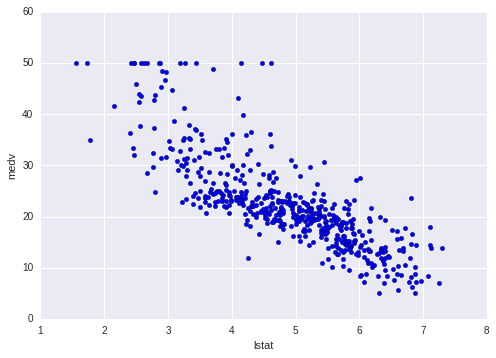

In [14]:
# 모델에 쓰인 데이터의 scatter plot과 모델의 결과를 plot 

plt.scatter(log_lstat, housing.medv)
plt.xlabel("lstat")

plt.ylabel("medv")

1.6 Comparing models

첫번째 모델: R-squared: 0.544
두번째 모델: R-squared: 0.662

In [15]:
#df = pd.DataFrame({'A' : [1,2,3,4], 'B' : ['a',np.nan,'b','a']})
housing2 = pd.read_csv('Data/Boston.csv', usecols=[12,13])
housing2.shape

(506, 2)

In [16]:
#df
# housing2

In [17]:
housing3 = housing2[lambda medv:housing2.medv < 49.0]

In [18]:
maybe_lstat2 = housing3.lstat + ((housing3.lstat)*(housing3.lstat))
log_lstat2 = np.log(maybe_lstat2)

In [19]:
lm_mul3 = smf.ols(formula='medv ~ log_lstat2', data=housing3).fit()
lm_mul3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     996.8
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          5.43e-120
Time:                        08:24:21   Log-Likelihood:                -1432.8
No. Observations:                 490   AIC:                             2870.
Df Residuals:                     488   BIC:                             2878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     50.5399      0.938     53.884      0.000        48.697    52.383
log_lstat2    -5.8889      0.187    -31.571      0.000        -6.255    -5.522
==============================================================================
Omnibus:                       71.664   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.574
Skew:                           0.901   Prob(JB):                     1.79e-26
Kurtosis:                       4.600   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

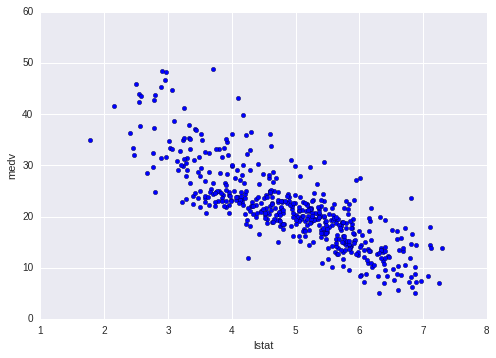

In [20]:
# 모델에 쓰인 데이터의 scatter plot과 모델의 결과를 plot 

plt.scatter(log_lstat2, housing3.medv)
plt.xlabel("lstat")

plt.ylabel("medv")

medv 49이하로 data를 한정할 경우 model 정확도 약간 향상됨.